In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('train.tsv', sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


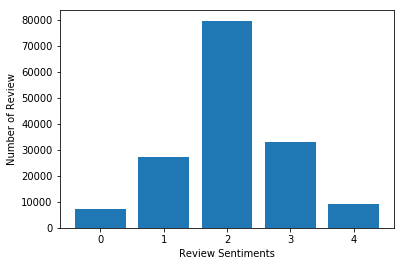

In [4]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

Total unique words: 15240


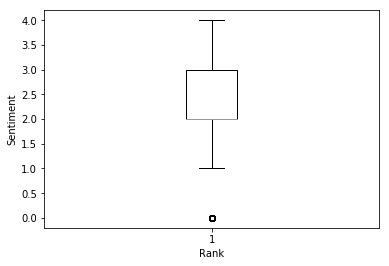

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
d=vect.fit_transform(data.Phrase)
print('Total unique words:', len(vect.get_feature_names()))
plt.boxplot(data.Sentiment)
plt.xlabel('Rank')
plt.ylabel('Sentiment')
plt.show();

4    7072
3    7072
2    7072
1    7072
0    7072
Name: Sentiment, dtype: int64


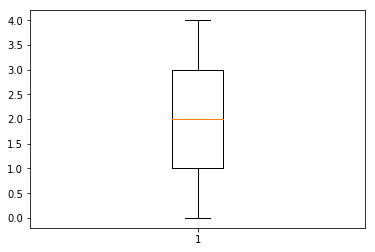

In [6]:
data2=data.sample(frac=1).groupby('Sentiment', sort=False).head(7072)
print(data2.Sentiment.value_counts())
plt.boxplot(data2.Sentiment)
plt.show();

In [7]:
# data=data2
# from bs4 import BeautifulSoup
# data.Phrase=data.Phrase.apply(lambda x: BeautifulSoup(x, "lxml").get_text())

In [8]:
import string
data=data2.copy()
def remove_puc(text):
    no_puc=''.join([c for c in text if c not in string.punctuation])
    return no_puc
data.Phrase=data.Phrase.apply(lambda x:remove_puc(x))
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
82383,82384,4255,a lot of nubile young actors in a film about c...,2
102372,102373,5387,it s so muddled and derivative that few will b...,2
72151,72152,3685,the stops,2
146558,146559,7972,her tough funny rather chaotic show is nt s...,2
43592,43593,2110,of maleridden angst,1


In [9]:
from nltk.tokenize import word_tokenize
data.Phrase=data.Phrase.apply(lambda x: word_tokenize(x.lower()))
data.tail(10)

,PhraseId,SentenceId,Phrase,Sentiment
14292,14293,616,"[an, insultingly, inept, and, artificial, exam...",0
39902,39903,1906,"[genre, a, bad, name]",0
82696,82697,4270,"[this, is, one, of, the, biggest, disappointme...",0
5674,5675,225,"[the, experience, of, staring, at, a, blank, s...",0
152343,152344,8313,"[see, why, any, actor, of, talent, would, ever...",0
90823,90824,4726,"[all, this, visual, trickery, stops, being, cl...",0
44619,44620,2163,"[enough, said, except, film, overboard]",0
34328,34329,1611,"[of, being, overrun, by, corrupt, and, hedonis...",0
99944,99945,5244,"[really, horrible, drek]",0
121114,121115,6486,"[but, it, also, does, the, absolute, last, thi...",0


[('the', 13974), ('a', 10967), ('and', 10072), ('of', 9246), ('to', 6412), ('s', 4569), ('is', 4532), ('that', 3930), ('in', 3828), ('it', 3448), ('as', 2565), ('with', 2329), ('film', 2151), ('for', 2050), ('movie', 2013), ('its', 1968), ('an', 1963), ('this', 1811), ('you', 1458), ('be', 1366)]
('the', 13974) ('a', 10967) ('and', 10072) ('of', 9246) ('to', 6412) ('s', 4569) ('is', 4532) ('that', 3930) ('in', 3828) ('it', 3448) ('as', 2565) ('with', 2329) ('film', 2151) ('for', 2050) ('movie', 2013) ('its', 1968) ('an', 1963) ('this', 1811) ('you', 1458) ('be', 1366)
('the', 'a', 'and', 'of', 'to', 's', 'is', 'that', 'in', 'it', 'as', 'with', 'film', 'for', 'movie', 'its', 'an', 'this', 'you', 'be') (13974, 10967, 10072, 9246, 6412, 4569, 4532, 3930, 3828, 3448, 2565, 2329, 2151, 2050, 2013, 1968, 1963, 1811, 1458, 1366)


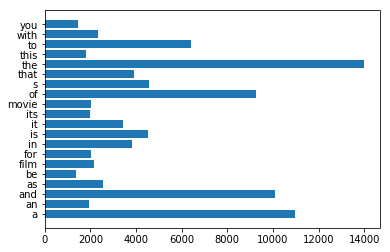

In [11]:
from nltk.probability import FreqDist
fdist=data.Phrase.values
dist=FreqDist(word.lower() for l in list(fdist) for word in l)
print(dist.most_common(n=20))
print(*dist.most_common(n=20))
print(zip(*dist.most_common(n=20)))
print(*zip(*dist.most_common(n=20)))
plt.barh(*zip(*dist.most_common(n=20)));
plt.show();

In [11]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(text):
    words=[w for w in text if w not in stopwords.words('english')]
    return words
data.Phrase=data.Phrase.apply(lambda x: remove_stopwords(x))
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
53075,53076,2632,[one],1
66682,66683,3384,"[carrying, bag, golf, clubs, one, shoulder]",2
46817,46818,2279,"[made, film, undeniably, worthy, devastating, ...",3
86101,86102,4457,"[myers, turned, franchise, movie, version, ado...",2
37922,37923,1803,"[pretty, good, thing]",3
85602,85603,4427,"[jaunt, memory, lane, teens, young, adults, gr...",2
110096,110097,5830,[funnier],2
86402,86403,4473,"[nt, capture, effect, tragic, deaths, hiphop, ...",1
147052,147053,8003,[cursing],1
64967,64968,3287,"[pointed, political, allegory]",2


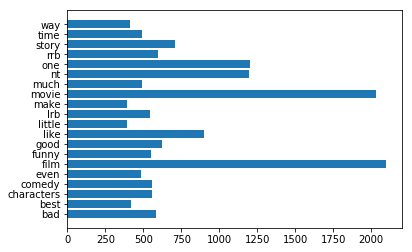

In [12]:
fdist=data.Phrase.values
dist=FreqDist(word.lower() for l in list(fdist) for word in l)
plt.barh(*zip(*dist.most_common(n=20)));
plt.show();

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text=' '.join([lemmatizer.lemmatize(i,pos='v') for i in text])
    return lem_text
data.Phrase=data.Phrase.apply(lambda x: word_lemmatizer(x))
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
53075,53076,2632,one,1
66682,66683,3384,carry bag golf club one shoulder,2
46817,46818,2279,make film undeniably worthy devastate experience,3
86101,86102,4457,myers turn franchise movie version adolescent ...,2
37922,37923,1803,pretty good thing,3
85602,85603,4427,jaunt memory lane teens young adults grow tele...,2
110096,110097,5830,funnier,2
86402,86403,4473,nt capture effect tragic deaths hiphop culture,1
147052,147053,8003,curse,1
64967,64968,3287,point political allegory,2


Total unique words: 12583


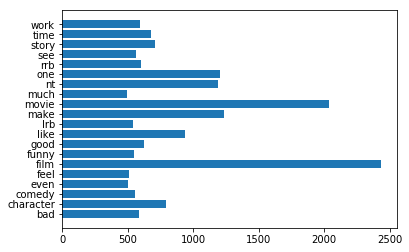

In [14]:
d=vect.fit_transform(data.Phrase)
print('Total unique words:', len(vect.get_feature_names()))
fdist_list=list(data.Phrase.values)
fdist_lt=[i.split(' ') for i in fdist_list]
dist=FreqDist(word.lower() for l in fdist_lt for word in l)
plt.barh(*zip(*dist.most_common(n=20)));
plt.show();

In [15]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split
# ( data.Phrase, data.Sentiment,random_state=42, test_size=0.3, 
#                         shuffle=True, stratify=data.Sentiment)
# X_train.head()

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
from sklearn.linear_model import SGDClassifier
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                         ('svm', SGDClassifier(loss='hinge', penalty='l2',
                            alpha=1e-3, random_state=42)),])
svm_cv = cross_val_score(pipe, data.Phrase, y=data.Sentiment, n_jobs=-1,cv=5)
print("CV Score for each fold:", svm_cv)
pipe.fit(data.Phrase, data.Sentiment)
print("SVM train:",metrics.classification_report(data.Sentiment, pipe.predict(data.Phrase)))
# print("SVM test:",metrics.classification_report(y_test, pipe.predict(X_test)))
# print(metrics.confusion_matrix(y_test,pipe.predict(X_test)))

CV Score for each fold: [ 0.5024735   0.49540636  0.50084866  0.51103253  0.49759547]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVM train:              precision    recall  f1-score   support

          0       0.65      0.84      0.74      7072
          1       0.70      0.54      0.61      7072
          2       0.78      0.67      0.72      7072
          3       0.72      0.44      0.55      7072
          4       0.60      0.89      0.72      7072

avg / total       0.69      0.68      0.67     35360



In [19]:
import lightgbm as LGBM
clf_lgbm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                         ('clf-lgbm', LGBM.LGBMClassifier(random_state=42,n_jobs=-1,)),])
lgbm_cv = cross_val_score(clf_lgbm, data.Phrase, y=data.Sentiment, n_jobs=-1,cv=5)
print("CV Score for each fold:", lgbm_cv)
clf_lgbm.fit(data.Phrase, data.Sentiment)
print("LGBM train:",metrics.classification_report(data.Sentiment, clf_lgbm.predict(data.Phrase)))
# print("LGBM test:",metrics.classification_report(y_test,clf_lgbm.predict(X_test)))

CV Score for each fold: [ 0.47321555  0.47208481  0.46633663  0.46916549  0.4718529 ]
LGBM train:              precision    recall  f1-score   support

          0       0.69      0.62      0.65      7072
          1       0.51      0.38      0.43      7072
          2       0.43      0.73      0.55      7072
          3       0.55      0.35      0.43      7072
          4       0.66      0.69      0.67      7072

avg / total       0.57      0.55      0.54     35360



In [20]:
from sklearn.linear_model import LogisticRegression
clf_LR = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                         ('clf-LR', LogisticRegression(random_state=42)),])
LR_cv = cross_val_score(clf_LR, data.Phrase, y=data.Sentiment, n_jobs=-1,cv=5)
print("CV Score for each fold:", LR_cv)
clf_LR.fit(data.Phrase, data.Sentiment)
print("LR train:",metrics.classification_report(data.Sentiment, clf_LR.predict(data.Phrase)))
# print("LR test:",metrics.classification_report(y_test, clf_LR.predict(X_test)))
# print(metrics.confusion_matrix(y_test,clf_LR.predict(X_test)))

CV Score for each fold: [ 0.52254417  0.51293286  0.52545969  0.52899576  0.51966054]
LR train:              precision    recall  f1-score   support

          0       0.73      0.79      0.76      7072
          1       0.68      0.60      0.64      7072
          2       0.68      0.73      0.70      7072
          3       0.67      0.57      0.61      7072
          4       0.72      0.81      0.76      7072

avg / total       0.70      0.70      0.69     35360



In [21]:
from sklearn.model_selection import GridSearchCV
para={'vect__ngram_range': [(1,1),(1,2)],
     'tfidf__norm': ['l1','l2'],
      'tfidf__use_idf': [True,False],}
LR_gs = GridSearchCV(clf_LR, param_grid=para, n_jobs=-1, cv=5)
LR_gs.fit(data.Phrase, data.Sentiment);
print('best_parameters: ',LR_gs.best_params_)
print("LGBM train:",metrics.classification_report(data.Sentiment, LR_gs.predict(data.Phrase)))
# print("LGBM test:",metrics.classification_report(y_test,LR_gs.predict(X_test)))

best_parameters:  {'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}
LGBM train:              precision    recall  f1-score   support

          0       0.80      0.84      0.82      7072
          1       0.78      0.73      0.75      7072
          2       0.79      0.81      0.80      7072
          3       0.78      0.70      0.74      7072
          4       0.79      0.86      0.82      7072

avg / total       0.79      0.79      0.79     35360

